In [39]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score


In [40]:
real=pd.read_csv("/content/real_estate.csv")

In [41]:
real


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [42]:
real.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

min:2012.67
max:2013.58
mean:2013.15
median:2013.17
mode:2013.42


min:0.00
max:43.80
mean:17.71
median:16.10
mode:0.00


min:23.38
max:6488.02
mean:1083.89
median:492.23
mode:289.32


min:0.00
max:10.00
mean:4.09
median:4.00
mode:0.00


min:24.93
max:25.01
mean:24.97
median:24.97
mode:24.97


min:121.47
max:121.57
mean:121.53
median:121.54
mode:121.54


min:7.60
max:117.50
mean:37.98
median:38.45
mode:24.70




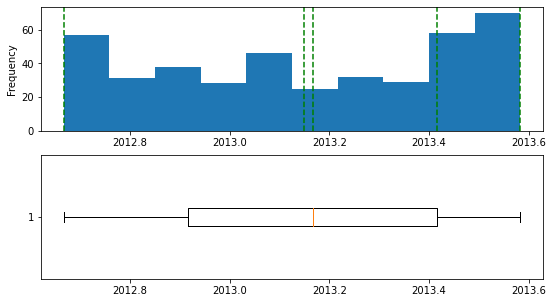

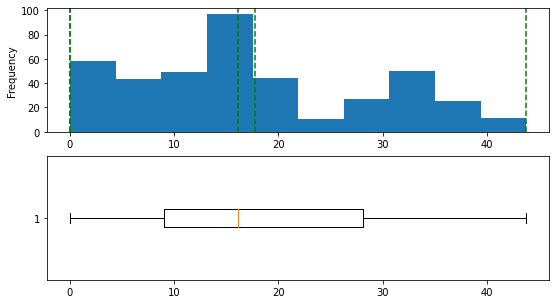

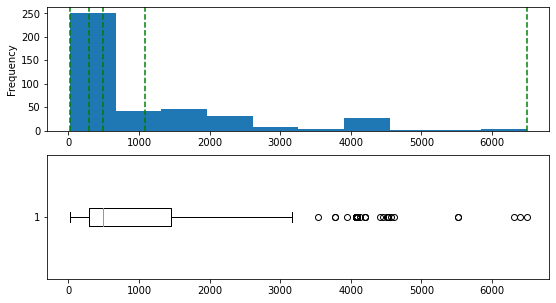

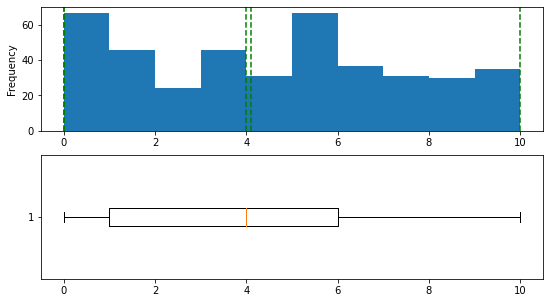

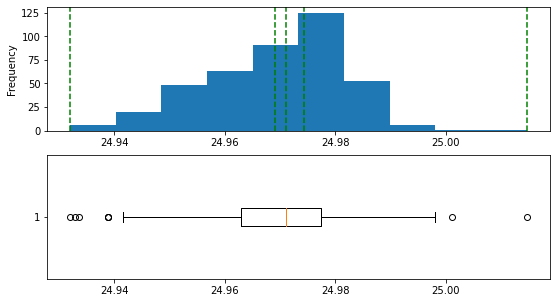

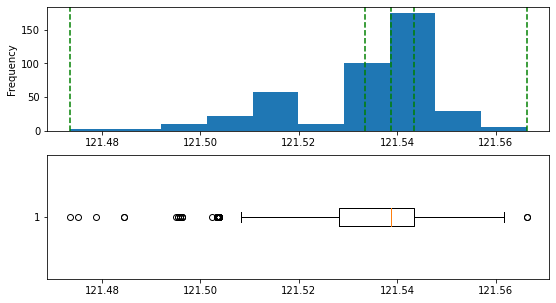

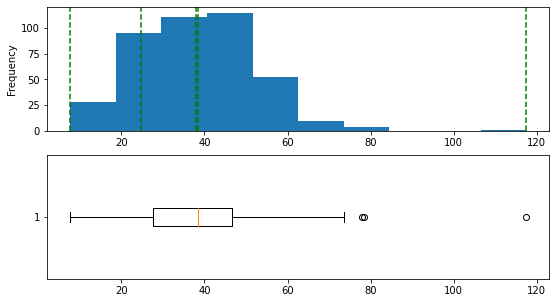

In [43]:
def show(data):
  min_val=data.min()
  max_val=data.max()
  mean_val=data.mean()
  median=data.median()
  mode=data.mode()[0]
  print('min:{:.2f}\nmax:{:.2f}\nmean:{:.2f}\nmedian:{:.2f}\nmode:{:.2f}\n\n'.format(min_val,max_val,mean_val,median,mode))
  fig,ax=plt.subplots(2,1,figsize=(9,5))
  ax[0].hist(data)
  ax[0].set_ylabel('Frequency')
  ax[0].axvline(x=min_val,color='green',linestyle='dashed')
  ax[0].axvline(x=max_val,color='green',linestyle='dashed')
  ax[0].axvline(x=mean_val,color='green',linestyle='dashed')
  ax[0].axvline(x=median,color='green',linestyle='dashed')
  ax[0].axvline(x=mode,color='green',linestyle='dashed')
  ax[1].boxplot(data,vert=False)
  
  fig.show()

for column in real.columns:
  show(real[column])

In [60]:
real=real[real.price_per_unit<74]

In [61]:
label = real.price_per_unit

In [62]:
label

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price_per_unit, Length: 411, dtype: float64

In [63]:
y = label
x= real.drop('price_per_unit',axis=1)

correlation value oftransaction_date and label is 0.06701


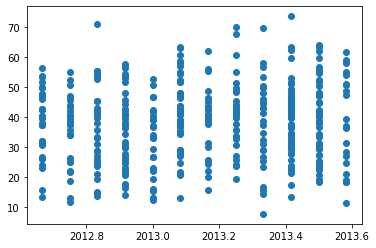

correlation value ofhouse_age and label is -0.24285


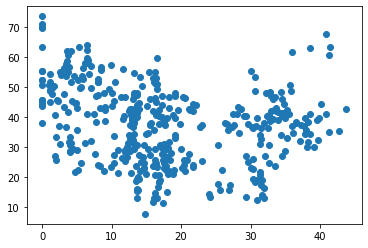

correlation value oftransit_distance and label is -0.70135


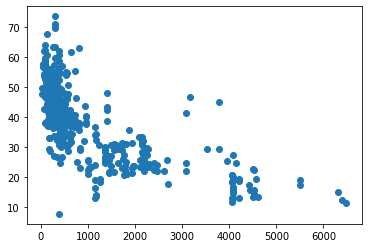

correlation value oflocal_convenience_stores and label is 0.60585


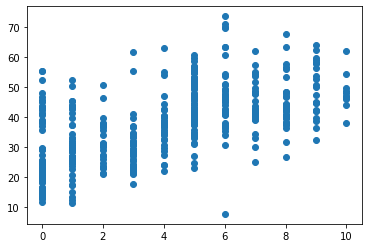

correlation value oflatitude and label is 0.57185


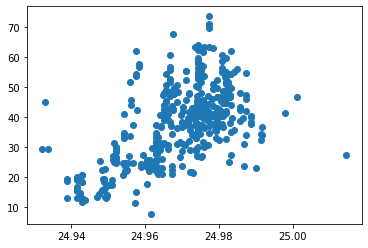

correlation value oflongitude and label is 0.55459


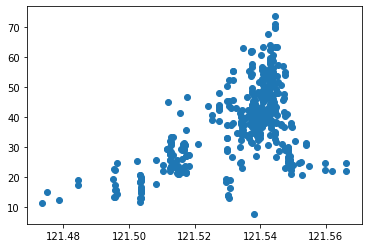

In [64]:
for col in x.columns:
  print("correlation value of"+col+" and label is {:.5f}".format(x[col].corr(label)))
  plt.scatter(x[col],label)
  plt.show()



In [65]:
categorical = ['local_convenience_stores','transaction_date']
numerical = ['house_age','longitude','latitude', 'transit_distance']



/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


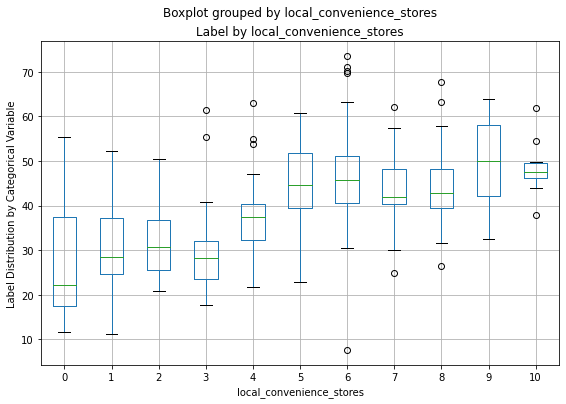

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


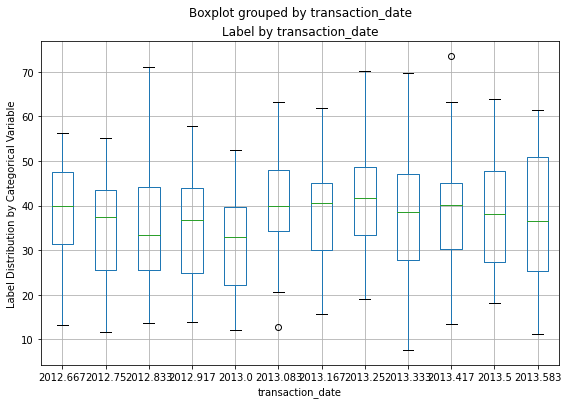

In [66]:
for col in categorical:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  real.boxplot(column = 'price_per_unit', by = col, ax = ax)
  ax.set_title('Label by ' + col)
  ax.set_ylabel("Label Distribution by Categorical Variable")
  plt.show()

In [111]:
x=real[real.columns[1:-1].values]
x


,house_age,transit_distance,local_convenience_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [112]:
print(x.iloc[1])

house_age                    19.50000
transit_distance            306.59470
local_convenience_stores      9.00000
latitude                     24.98034
longitude                   121.53951
Name: 1, dtype: float64


In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer=Pipeline(steps=[('standard',StandardScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressr', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressr', RandomForestRegressor())])


MSE: 31.736037362887142
RMSE: 5.633474714852916
R2: 0.7755198689896562


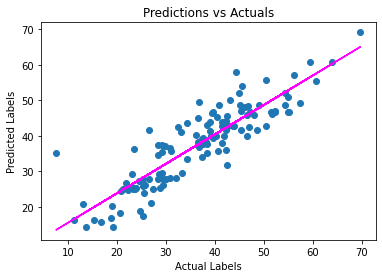

In [119]:
# Get predictions
predictions = model.predict(x_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [120]:
import joblib
filename = './real_estate_model.pkl'

joblib.dump(model, filename)
print(x.iloc[1])

house_age                    19.50000
transit_distance            306.59470
local_convenience_stores      9.00000
latitude                     24.98034
longitude                   121.53951
Name: 1, dtype: float64


In [121]:
loaded_model = joblib.load(filename)
x_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

results = model.predict(x_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))
    

Predictions:
46.84
16.45


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
